# Introduction

Hello!

In this notebook, I will try to classify a person who's having a higher chance of getting a heart attack using simple ML LogisticRegression Model.
The dataset that I will be using is 'heart.csv', for simplicity purpose, I won't use the 'o2Saturation.csv' dataset.

This is my first ever kaggle notebook, so critics and tips are highly appreciated.

Thank you!

# Data Overview

In [3]:
# importing packages
import pandas as pd
import numpy as np

# viz library
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
sns.set_style('whitegrid')

In [4]:
df = pd.read_csv('heart.csv')
print('data shape : ', df.shape)
df.head()

data shape :  (303, 14)


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.info()
# No null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# Data Cleaning

In [6]:
df.duplicated().sum()

# 1 duplicated rows

1

In [7]:
# dropping duplicated rows
df.drop_duplicates(inplace = True)

Creating a correlation heatmap

<AxesSubplot:>

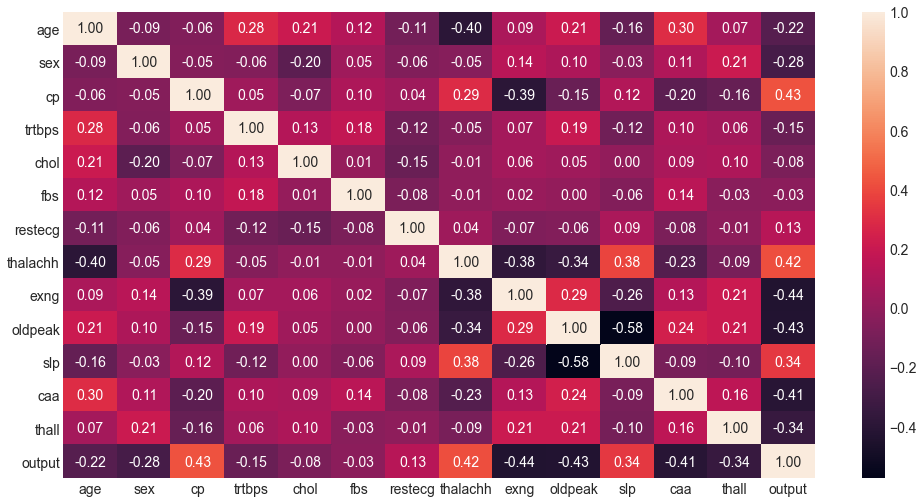

In [8]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot = True, fmt = '.2f')

# EDA

The dataset description doesn't give the information whether 1 is male or female, so I'm assuming that :
- 0 = female
- 1 = male

From the countplot below, there are some information that we can gather, that is :
- Female has a higher risk of getting a heart attack
- A person with normal thallasemia has a higher risk of getting a heart attack
- A person without exng has a higher risk of getting heart attack
- A person with a chest pain (type 1,2,3) has aa higher risk of getting heart attack
- A person with downsloping has a higher risk of getting heart attack
- A person having resting electrocardiograph of 1 (ST-T wave abnormality) has a higher chance of getting heart attack

Text(0.5, 1.0, 'rest ecg based on output')

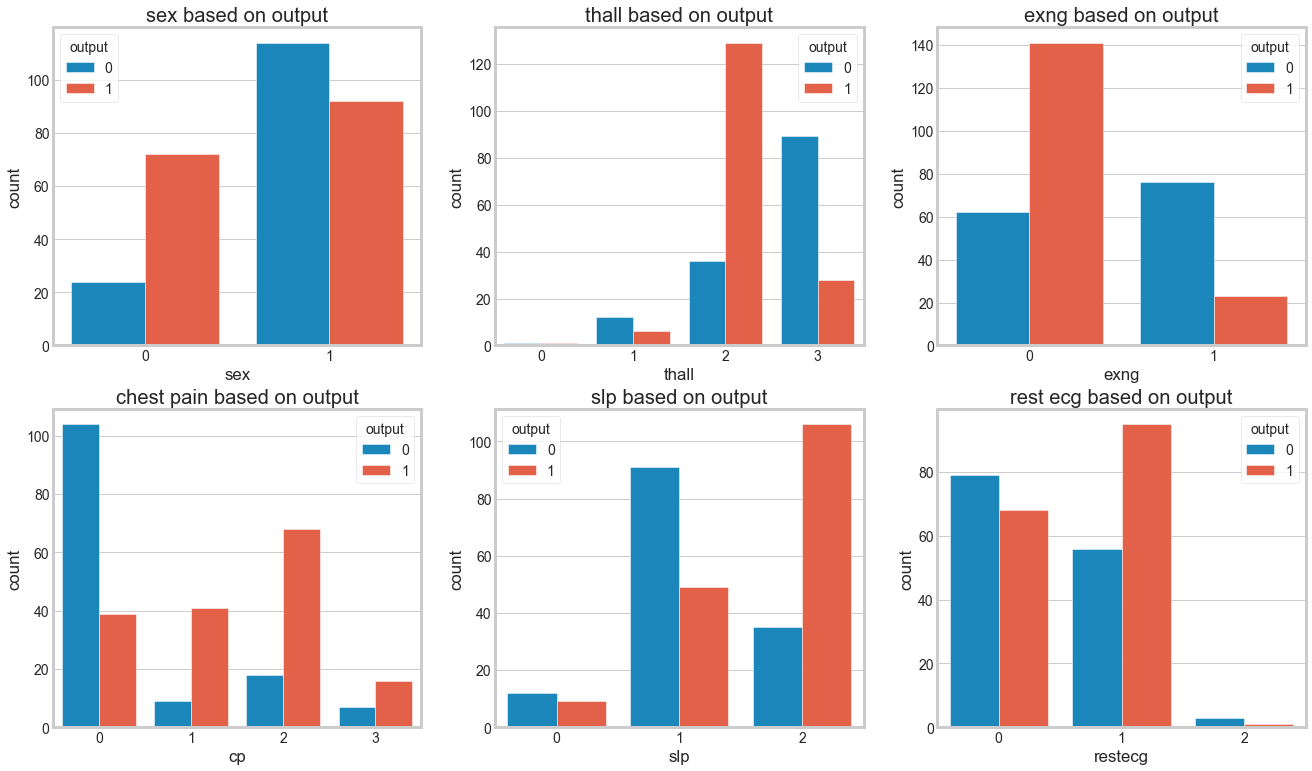

In [9]:
fig,axes = plt.subplots(2,3,figsize=(20,12))
col = ['sex', 'thall', 'exng']
sns.countplot(ax = axes[0, 0], data = df, x = 'sex', hue ='output')
sns.countplot(ax = axes[0, 1],data = df, x = 'thall', hue = 'output')
sns.countplot(ax = axes[0, 2],data = df, x = 'exng', hue = 'output')
sns.countplot(ax = axes[1, 0],data = df, x = 'cp', hue = 'output')
sns.countplot(ax = axes[1, 1],data = df, x = 'slp', hue = 'output')
sns.countplot(ax = axes[1, 2],data = df, x = 'restecg', hue = 'output')


# adding title to each subplots
axes[0,0].set_title('sex based on output')
axes[0,1].set_title('thall based on output')
axes[0,2].set_title('exng based on output')
axes[1,0].set_title('chest pain based on output')
axes[1,1].set_title('slp based on output')
axes[1,2].set_title('rest ecg based on output')

#plt.title('Output based on Gender')

Text(0.5, 1.0, 'Age countplot')

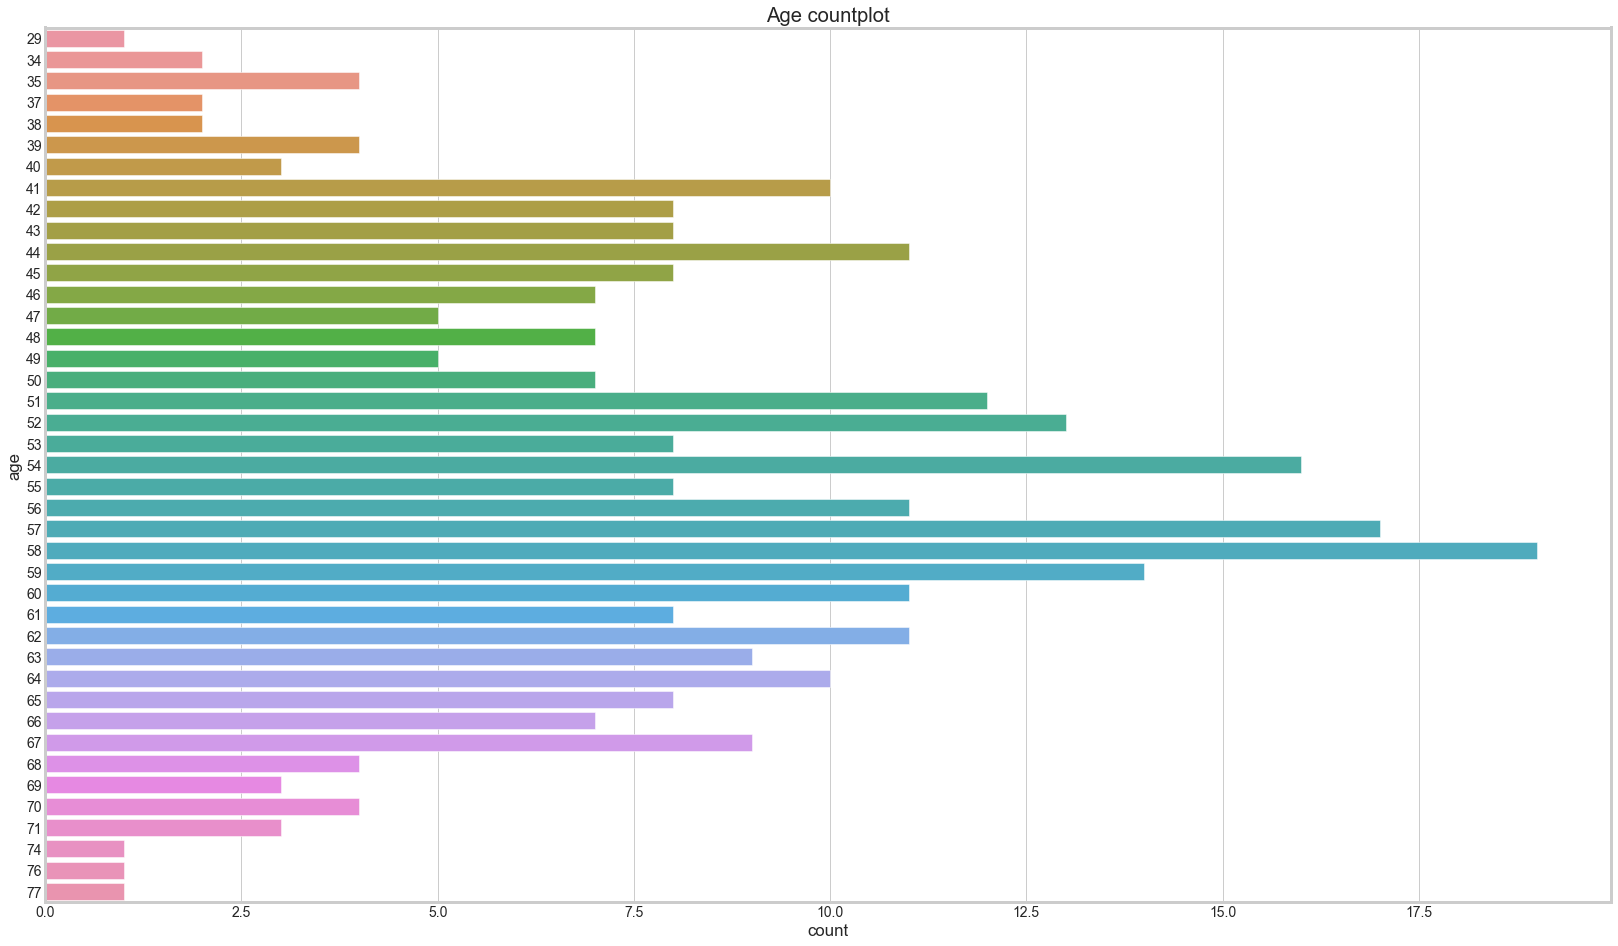

In [10]:
plt.figure(figsize=(25,15))
sns.countplot(data = df, y = df['age'])
plt.title('Age countplot')

Thalach (peak heart rate) distribution of a person without a heart attack is normally distributed.
Meanwhile, thalach distribution of a person with a heart attack has a negative skew.

Also, a person with a chance of heart attack has a higher peak heart rate.

<Figure size 720x576 with 0 Axes>

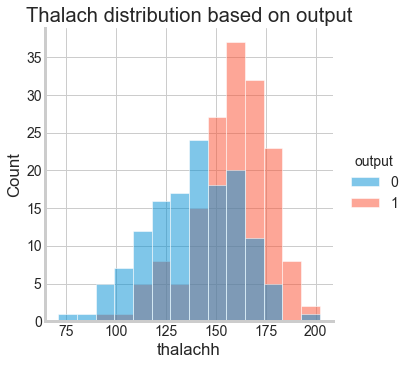

In [21]:
plt.figure(figsize=(10,8))
#sns.displot(data = df, x = 'thalachh', kde = True, hue = 'output')
sns.displot(data = df, x = 'thalachh', hue = 'output')
plt.title('Thalach distribution based on output')
plt.show()

A person with a chance of heart attack has a higher cholesterol, althought both of them has a positive skewness.

Text(0.5, 1.0, 'cholesterol based on output')

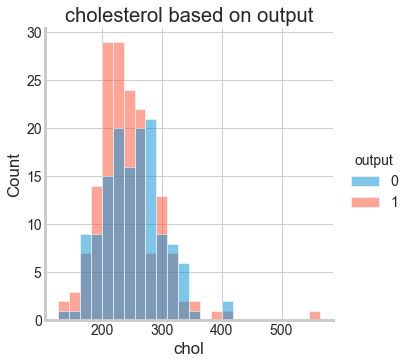

In [22]:
sns.displot(data = df, x = 'chol', hue = 'output')
plt.title('cholesterol based on output')

# Modelling

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [24]:
X = df.drop('output', axis = 1)
y = df['output']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
logmodel = LogisticRegression(solver='lbfgs', max_iter=1000)
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [27]:
pred = logmodel.predict(X_test)

In [28]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80        42
           1       0.82      0.86      0.84        49

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91



In [29]:
print('accuracy on test set : ' , logmodel.score(X_test,y_test))

accuracy on test set :  0.8241758241758241
